In [32]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from random import sample
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import pandas as pd

from sklearn import metrics
from scipy.spatial.distance import cdist 
import numpy as np 

In [3]:
data_df = pd.read_csv("data/encoded_data.csv")

data_df.shape

encoded = 0


In [4]:
inertias = []
distortions = []
mapping1 = {}
mapping2 = {}

K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_df)
    inertias.append(kmeanModel.inertia_)
    mapping2[k] = kmeanModel.inertia_
    
    distortions.append(sum(np.min(cdist(data_df, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / data_df.shape[0]) 
    mapping1[k] = sum(np.min(cdist(data_df, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / data_df.shape[0] 

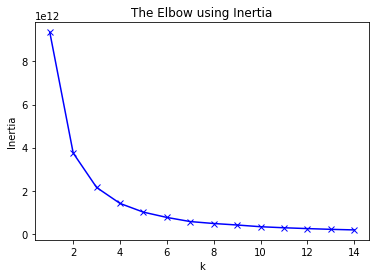

In [5]:
# plt.figure(figsize=(10,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow using Inertia')
plt.show()

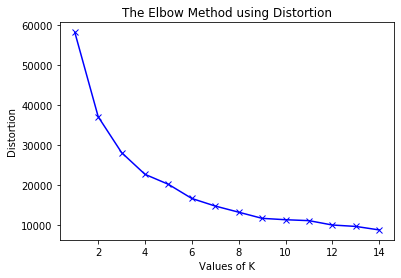

In [6]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [95]:
optimal_k = 7

kmeanModel = KMeans(n_clusters=optimal_k, random_state=11)
kmeanModel.fit(data_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=11, tol=0.0001, verbose=0)

In [96]:
optimal_k = 7

kmeanModel = KMeans(n_clusters=optimal_k, random_state=11)
kmeanModel.fit(data_df)

clusters = {i:[] for i in range(optimal_k)}

cluster_labels = kmeanModel.labels_

for record, cluster_number in zip(data_df.iterrows(), cluster_labels):
    clusters[cluster_number].append(record[1])

percent = 0.25

stratified_sample = []

for cluster_number in clusters.keys():
    stratified_sample.extend(sample(clusters[cluster_number], int(len(clusters[cluster_number]) * percent)))

In [97]:
len(stratified_sample)

362

In [98]:
random_sample = data_df.sample(frac=0.25, random_state=11)

In [99]:
len(random_sample)

365

### PCA for all 3 

In [100]:
scaler = MinMaxScaler()

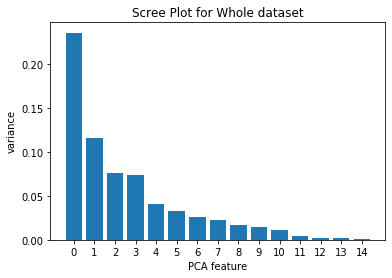

Principal components = : 5


In [101]:
pca = PCA(n_components=15)

pca.fit(scaler.fit_transform(data_df))

features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.title("Scree Plot for Whole dataset")
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

# calculate principal components
total = 0
principal_components = 0

for val in pca.explained_variance_ratio_:
    total += val
    principal_components += 1
    if total >= 0.75:
        break

print("Principal components = :", principal_components)

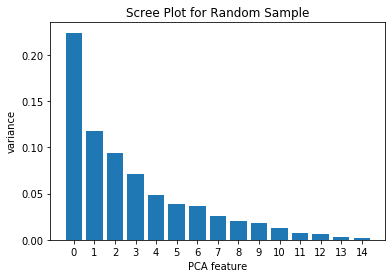

Principal components = : 5


In [102]:
pca = PCA(n_components=15)

pca.fit(scaler.fit_transform(random_sample))

features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.title("Scree Plot for Random Sample")
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

# calculate principal components
total = 0
principal_components = 0

for val in pca.explained_variance_ratio_:
    total += val
    principal_components += 1
    if total >= 0.75:
        break

print("Principal components = :", principal_components)

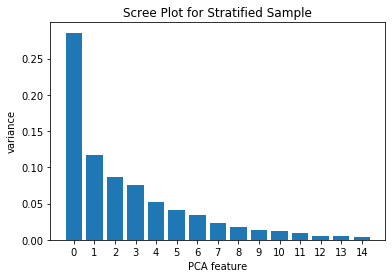

Principal components = : 5


In [104]:
pca = PCA(n_components=15)

pca.fit(scaler.fit_transform(stratified_sample))

features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.title("Scree Plot for Stratified Sample")
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

# calculate principal components
total = 0
principal_components = 0

for val in pca.explained_variance_ratio_:
    total += val
    principal_components += 1
    if total >= 0.75:
        break

print("Principal components = :", principal_components)

In [105]:
type(pca)

sklearn.decomposition.pca.PCA

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # # some fake data
# # data = np.random.randn(1000)
# # # evaluate the histogram
# # values, base = np.histogram(data, bins=40)
# #evaluate the cumulative
# cumulative = np.cumsum(pca.explained_variance_)
# # plot the cumulative function
# plt.plot(features, cumulative, c='blue')
# # len(base)

In [15]:
# # convert categorical to numeric equivalent

# encoded_categorical = ['SaleCondition', 'HeatingQC', 'KitchenQual', 'BldgType', 'RoofStyle', 'SaleType']

# # so that we don't encode again and again when we run the code
# if encoded == 0:
    
#     # SaleCondition
#     encode_dict = {
#         "Normal"  : 1,
#         "Abnorml" : 2,
#         "AdjLand" : 3,
#         "Alloca"  : 4,
#         "Family"  : 5,
#         "Partial" : 6    
#     }
    
#     data_df["SaleCondition"] = data_df.SaleCondition.map(encode_dict)
    
#     # HeatingQC
#     encode_dict = {
#         "Ex" : 5,
#         "Gd" : 4,
#         "TA" : 3,
#         "Fa" : 2,
#         "Po" : 1
#     }

#     data_df["HeatingQC"] = data_df.HeatingQC.map(encode_dict)
    
#     # KitchenQual
#     encode_dict = {
#         "Ex" : 5,
#         "Gd" : 4,
#         "TA" : 3,
#         "Fa" : 2,
#         "Po" : 1
#     }

#     data_df["KitchenQual"] = data_df.KitchenQual.map(encode_dict)

#     # BldgType
#     encode_dict = {
#         "1Fam"   : 1,
#         "2fmCon" : 2,
#         "Duplex" : 3,
#         "TwnhsE" : 4,
#         "Twnhs"  : 5,
#     }

#     data_df["BldgType"] = data_df.BldgType.map(encode_dict)
    
#     # RoofStyle
#     encode_dict = {
#         "Flat"    : 1,
#         "Gable"   : 2,
#         "Gambrel" : 3,
#         "Hip"     : 4,
#         "Mansard" : 5,
#         "Shed"    : 6
#     }

#     data_df["RoofStyle"] = data_df.RoofStyle.map(encode_dict)
    
#     # SaleType
#     encode_dict = {
#         "WD"    : 1,
#         "CWD"   : 2,
#         "VWD"   : 3,
#         "New"   : 4,
#         "COD"   : 5,
#         "Con"   : 6,
#         "ConLw" : 7,
#         "ConLI" : 8,
#         "ConLD" : 9,
#         "Oth"   : 10
#     }

#     data_df["SaleType"] = data_df.SaleType.map(encode_dict)
    
# encoded = 1

In [16]:
# data_df = data_df[numerical_features]
# data_df.isnull().sum(axis = 0)
# data_df["BldgType"].unique()
# data_df.shape

In [17]:
# df.sample(frac=0.25, random_state=11)

In [18]:
# pca = PCA(n_components=2)

# pca.fit(data_df)transformed = pca.transform(data_df)

# transformed.shape

# features = range(pca.n_components_)

In [19]:
# transformed = pca.transform(data_df)

# transformed.shape

In [20]:
# features

In [21]:
# plt.bar(features, pca.explained_variance_)
# plt.xticks(features)
# plt.ylabel('variance')
# plt.xlabel('PCA feature')
# plt.show()

In [22]:
# data_df.to_csv("encoded_data.csv", index = None, header=True)

In [23]:
# sample = data_df.sample(frac=0.25, random_state=11)
# sample.shape

In [24]:
# transformed = pca.transform(data_df)

# transformed.shape

In [25]:
# features

In [26]:
# plt.bar(features, pca.explained_variance_)
# plt.xticks(features)
# plt.ylabel('variance')
# plt.xlabel('PCA feature')
# plt.show()